In [2]:
import pandas as pd

# Chamada do dataframe principal


arquivo2 = ("tracks.csv")
dataframe2 = pd.read_csv(arquivo2)
dataframe2

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [35]:
def contagem  (dataframe2):
    
    c_iden = dataframe2.groupby(['id_artists']).size()
    c_release_date = dataframe2.groupby(['release_date']).size()
    c_danceability = dataframe2.groupby(['danceability']).size()
    c_energy  = dataframe2.groupby(['energy']).size()
    c_loudness = dataframe2.groupby(['loudness']).size()
   #c_mode = dataframe2.groupby(['mode']).size()
    c_speechiness =  dataframe2.groupby(['speechiness']).size()
    c_acousticness =  dataframe2.groupby(['acousticness']).size()
    c_instrumentalness =  dataframe2.groupby(['instrumentalness']).size()
    c_liveness = dataframe2.groupby(['liveness']).size()
    c_valence = dataframe2.groupby(['valence']).size()
    c_tempo = dataframe2.groupby(['tempo']).size()
    c_time_signature = dataframe2.groupby(['time_signature']).size()
    
    l_contagem = pd.Series([c_iden, c_release_date, c_danceability,  c_energy,  c_loudness,  c_speechiness ,c_acousticness,c_instrumentalness ,c_liveness, c_valence, c_tempo, c_time_signature ],
    index=["c_iden", "c_release_date", "c_danceability", " c_energy"," c_loudness", "c_speechiness" ,"c_acousticness","c_instrumentalness" ,"c_liveness","c_valence","c_tempo","c_time_signature"])
    
    return l_contagem


art = dataframe2.groupby(['artists']).size()


In [28]:
# chamar informações das listas acima :
lista = (contagem(dataframe2))
lista["c_liveness"]

liveness
0.00000    43
0.00572     1
0.00838     1
0.00967     1
0.00986     1
           ..
0.99600    12
0.99700    13
0.99800     4
0.99900     4
1.00000     4
Length: 1782, dtype: int64

In [4]:
# Colunas transformadas em lista caso seja nescessária alguma manipulação  extra 
def listagem (dataframe2):
    iden = (dataframe2['id'])
    name = (dataframe2['name'])
    popularity = (dataframe2['popularity'])
    duration_ms = (dataframe2['duration_ms']) 
    explicit = (dataframe2['explicit'])
    artists = (dataframe2['artists']) 
    id_artist = (dataframe2['id_artists'])
    release_date = (dataframe2['release_date'])
    danceability = (dataframe2['danceability'])
    energy = (dataframe2['energy'])
    loudness  = (dataframe2['loudness'])
    mode = (dataframe2['mode'])
    speechiness = (dataframe2['speechiness'])
    acousticness = (dataframe2['acousticness'])
    instrumentalness = (dataframe2['instrumentalness'])
    liveness = (dataframe2['liveness'])
    valence = (dataframe2['valence'])
    tempo = (dataframe2['tempo']) 
    time_signature = (dataframe2['time_signature'])
    
    l_listagem = pd.Series([iden,name,popularity,duration_ms,explicit,artists,id_artist,release_date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature],
                           index=["iden","name","popularity","duration_ms","explicit","artists","id_artist","release_date","danceability","energy","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature"])
    return l_listagem

In [5]:
lista2 = (listagem(dataframe2))
lista2["acousticness"] 

0         0.674
1         0.797
2         0.994
3         0.995
4         0.989
          ...  
586667    0.785
586668    0.141
586669    0.895
586670    0.206
586671    0.105
Name: acousticness, Length: 586672, dtype: float64

In [6]:
# Outras ferramentas ...
'''
dataframe2['artists'].value_counts() 
dataframe2.iloc[142454]['artists'])
dataframe2f.groupby(['artists']).count() 

(dataframe2['artists'])
'''

iden = (dataframe2['id'])
print(iden)

0         35iwgR4jXetI318WEWsa1Q
1         021ht4sdgPcrDgSk7JTbKY
2         07A5yehtSnoedViJAZkNnc
3         08FmqUhxtyLTn6pAh6bk45
4         08y9GfoqCWfOGsKdwojr5e
                   ...          
586667    5rgu12WBIHQtvej2MdHSH0
586668    0NuWgxEp51CutD2pJoF4OM
586669    27Y1N4Q4U3EfDU5Ubw8ws2
586670    45XJsGpFTyzbzeWK8VzR8S
586671    5Ocn6dZ3BJFPWh4ylwFXtn
Name: id, Length: 586672, dtype: object


In [ ]:
from collections import Counter
#lista = pd.Series([[25,36,25,14,36,25],[74,85,96,74,85,96],[78,45,12,78,45,12]],
   #                 index=["t","q","p"])

In [ ]:
def moda(lispan):
    comuns = Counter(lispan).most_common()
    if (comuns[0][1]!=comuns[1][1]):
        return(f"moda = {comuns[0][0]}")
    else:
        modas=[comuns[0][0],comuns[1][0]]
        contador=2
        while(comuns[0][1]==comuns[contador][1]):
            modas.append(comuns[contador][0])
            contador+=1
            if contador==len(Counter(lispan)):
                break
        return(f"modas = {modas}")

In [ ]:
def detalhes(lista):
    doindex=0
    for x in lista:
        print(lista.index[doindex])
        doindex+=1
        pand=pd.Series(x)
        y=pand.describe()
        valores=["quantidade","media","mediana","moda","desvio padrão","menor","%25","%50","%75","maior"]
        contador=0
        for h in y:
            if contador==2:
                print(f"{valores[contador]} = {pand.median()}")
                contador+=1
                print(moda(pand))
                contador+=1
            if (contador>8) or (contador<6):
                print(f"{valores[contador]} = {h}")
            contador+=1
        print("\n")
detalhes(lista)

In [ ]:
tracksTypes = dataframe2.dtypes
tracks = dataframe2
tracksTypes

In [ ]:
tracks.boxplot(column="popularity")

In [ ]:
tracks.boxplot(column="duration_ms")

In [ ]:
tracks.boxplot(column="energy")

In [ ]:
tracks.boxplot(column="key")

In [ ]:
tracks.boxplot(column="loudness")

In [ ]:
tracks.boxplot(column="mode")

In [ ]:
tracks.boxplot(column="speechiness")

In [ ]:
tracks.boxplot(column="acousticness") 

In [ ]:
tracks.boxplot(column="instrumentalness")  

In [ ]:
tracks.boxplot(column="liveness")   

In [ ]:
tracks.boxplot(column="tempo")  

In [ ]:
tracks.boxplot(column="valence")

### Visualização de dados

In [3]:
# Visualização de dados

import seaborn as sns
import numpy as np

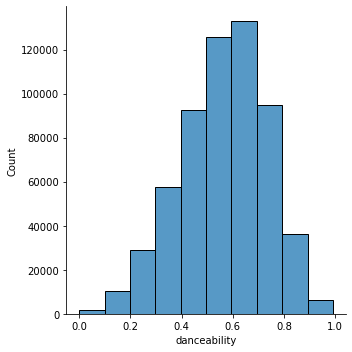

In [9]:
sns.displot(data=dataframe2, x='danceability', bins=10)


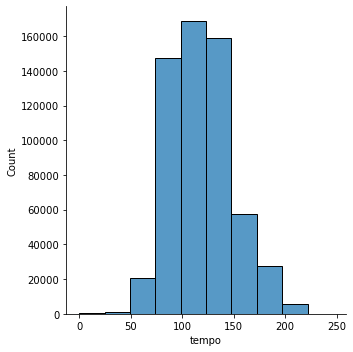

In [13]:
sns.displot(data=dataframe2, x='tempo', bins = 10)

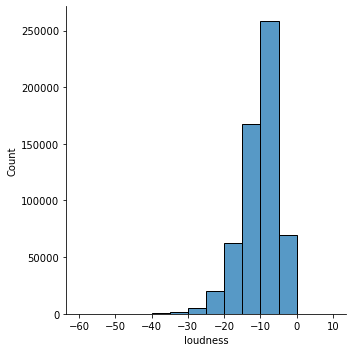

In [17]:
sns.displot(data=dataframe2, x='loudness',  binwidth=5)

<AxesSubplot:xlabel='energy', ylabel='loudness'>

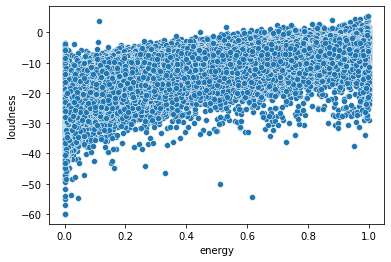

In [10]:
sns.scatterplot(data=dataframe2, x='energy', y='loudness')

<AxesSubplot:xlabel='tempo', ylabel='speechiness'>

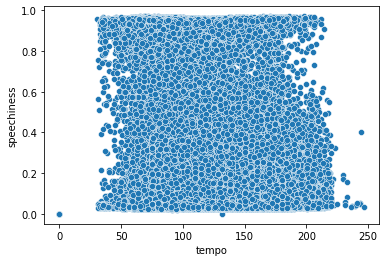

In [19]:
sns.scatterplot(data=dataframe2, x='tempo', y='speechiness')

<AxesSubplot:xlabel='popularity', ylabel='instrumentalness'>

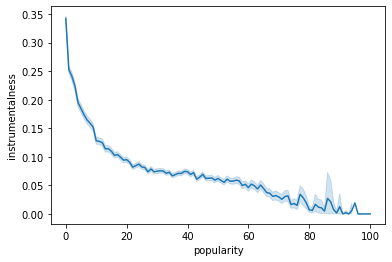

In [4]:
sns.lineplot(data=dataframe2, x='popularity', y='instrumentalness')